In [1]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91942\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('treanding_tweets2.csv')

In [4]:
df.head()

,Tweet,Sentiment,Likes,Retweets,Username,Follower_Count,Created_At
0,Success doesn’t come overnight. It takes effor...,Negative,0,0,SteveBalli,0,2025-04-21 06:57:03+00:00
1,Oregon State Dropout: My Unexpected Path to Su...,Positive,0,0,kidcadwell,726,2025-04-21 06:56:19+00:00
2,Unlock Your Authentic Self: Find the You Withi...,Positive,0,0,withRosabel,7497,2025-04-21 06:56:18+00:00
3,Quotes of the day! ✨\n#motivation https://t.co...,Neutral,0,0,masiadahariesok,23,2025-04-21 06:55:54+00:00
4,@DembeFm Good morning \nKindly drop me #Motiva...,Positive,0,0,AllanGwa,45,2025-04-21 06:55:21+00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet           60 non-null     object
 1   Sentiment       60 non-null     object
 2   Likes           60 non-null     int64 
 3   Retweets        60 non-null     int64 
 4   Username        60 non-null     object
 5   Follower_Count  60 non-null     int64 
 6   Created_At      60 non-null     object
dtypes: int64(3), object(4)
memory usage: 3.4+ KB


In [6]:
df.isnull().sum()

Tweet             0
Sentiment         0
Likes             0
Retweets          0
Username          0
Follower_Count    0
Created_At        0
dtype: int64

In [7]:
df.columns

Index(['Tweet', 'Sentiment', 'Likes', 'Retweets', 'Username', 'Follower_Count',
       'Created_At'],
      dtype='object')

In [8]:
text_df = df.drop(['Sentiment', 'Likes', 'Retweets', 'Username', 'Follower_Count',
       'Created_At'], axis=1)
text_df.head()

,Tweet
0,Success doesn’t come overnight. It takes effor...
1,Oregon State Dropout: My Unexpected Path to Su...
2,Unlock Your Authentic Self: Find the You Withi...
3,Quotes of the day! ✨\n#motivation https://t.co...
4,@DembeFm Good morning \nKindly drop me #Motiva...


In [9]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

Success doesn’t come overnight. It takes effort, persistence and belief in yourself. Some days will be tough, and progress might feel slow, but every step forward counts. Keep pushing, keep dreaming, and never let obstacles stop you from reaching your goals.  

 #Motivation #Work https://t.co/IkFNDrUjYV 

Oregon State Dropout: My Unexpected Path to Success
#OregonState #DropoutStory #SuccessStory #CollegeLife #UnexpectedPath #CorvallisOregon #HigherEducation #PersonalJourney #Inspiration #Motivation https://t.co/UGxgdXeoFI 

Unlock Your Authentic Self: Find the You Within #podcast
#SelfDiscovery #Authenticity #PersonalGrowth #Empowerment #Motivation #Inspiration #UnlockYourPotential #BelieveInYourself #InnerStrength #YouGotThis https://t.co/g8v7zMgbdL 

Quotes of the day! ✨
#motivation https://t.co/TsRC26YrNX 

@DembeFm Good morning 
Kindly drop me #Motivation by @BebeCoolUG 



In [10]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   60 non-null     object
dtypes: object(1)
memory usage: 612.0+ bytes


In [11]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [12]:
text_df = text_df.drop_duplicates('Tweet')

In [13]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
text_df['Tweet'] = text_df['Tweet'].apply(lambda x: stemming(x))

In [15]:
text_df.head()

,Tweet
0,Success doesn’t come overnight. It takes effor...
1,Oregon State Dropout: My Unexpected Path to Su...
2,Unlock Your Authentic Self: Find the You Withi...
3,Quotes of the day! ✨\n#motivation https://t.co...
4,@DembeFm Good morning \nKindly drop me #Motiva...


In [16]:
print(text_df['Tweet'].iloc[0],"\n")
print(text_df['Tweet'].iloc[1],"\n")
print(text_df['Tweet'].iloc[2],"\n")
print(text_df['Tweet'].iloc[3],"\n")
print(text_df['Tweet'].iloc[4],"\n")

Success doesn’t come overnight. It takes effort, persistence and belief in yourself. Some days will be tough, and progress might feel slow, but every step forward counts. Keep pushing, keep dreaming, and never let obstacles stop you from reaching your goals.  

 #Motivation #Work https://t.co/IkFNDrUjYV 

Oregon State Dropout: My Unexpected Path to Success
#OregonState #DropoutStory #SuccessStory #CollegeLife #UnexpectedPath #CorvallisOregon #HigherEducation #PersonalJourney #Inspiration #Motivation https://t.co/UGxgdXeoFI 

Unlock Your Authentic Self: Find the You Within #podcast
#SelfDiscovery #Authenticity #PersonalGrowth #Empowerment #Motivation #Inspiration #UnlockYourPotential #BelieveInYourself #InnerStrength #YouGotThis https://t.co/g8v7zMgbdL 

Quotes of the day! ✨
#motivation https://t.co/TsRC26YrNX 

@DembeFm Good morning 
Kindly drop me #Motivation by @BebeCoolUG 



In [17]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   60 non-null     object
dtypes: object(1)
memory usage: 612.0+ bytes


In [18]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [19]:
text_df['polarity'] = text_df['Tweet'].apply(polarity)

In [20]:
text_df.head(10)

,Tweet,polarity
0,Success doesn’t come overnight. It takes effor...,-0.109722
1,Oregon State Dropout: My Unexpected Path to Su...,0.200000
2,Unlock Your Authentic Self: Find the You Withi...,0.500000
3,Quotes of the day! ✨\n#motivation https://t.co...,0.000000
4,@DembeFm Good morning \nKindly drop me #Motiva...,0.650000
5,@933kfm @aggie_uwase Good morning \nKindly dro...,0.650000
6,Every great thing begins with a single step. T...,0.364286
7,No one sees the nights you doubt yourself.\nTh...,0.800000
8,"""Don't watch the clock; do what it does. Keep ...",0.300000
9,Today’s Power Packed Affirmation from Power of...,0.000000


In [21]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [22]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.to_csv('treanding_tweets3.csv', index=True)

In [23]:
text_df.head()

,Tweet,polarity,sentiment
0,Success doesn’t come overnight. It takes effor...,-0.109722,Negative
1,Oregon State Dropout: My Unexpected Path to Su...,0.200000,Positive
2,Unlock Your Authentic Self: Find the You Withi...,0.500000,Positive
3,Quotes of the day! ✨\n#motivation https://t.co...,0.000000,Neutral
4,@DembeFm Good morning \nKindly drop me #Motiva...,0.650000,Positive


<Axes: xlabel='sentiment', ylabel='count'>

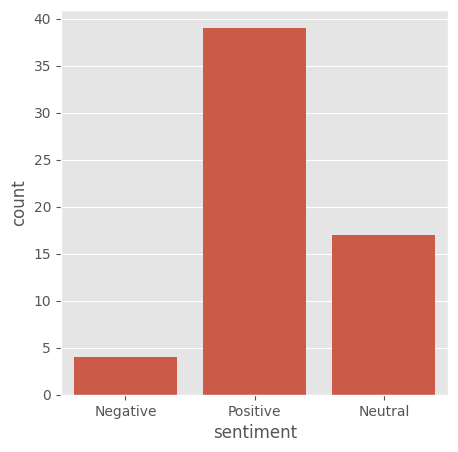

In [24]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

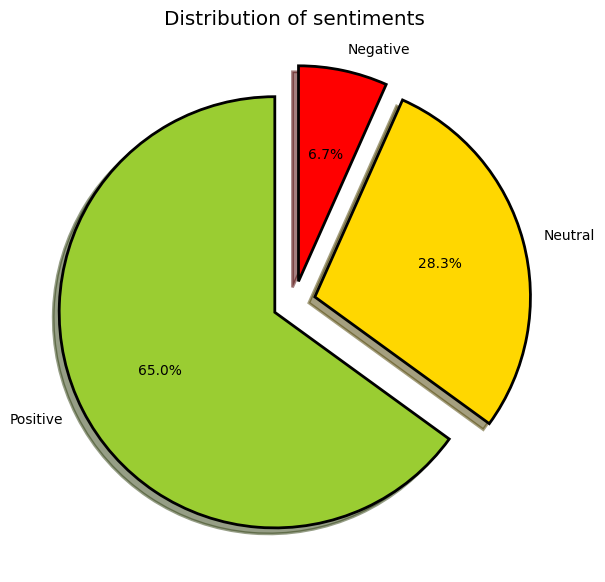

In [25]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [26]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Tweet,polarity,sentiment
16,100% off Udemy course coupon\n\nI Came To Win!...,1.00,Positive
59,"💖 ""Learn how to be happy with what you have wh...",0.80,Positive
7,No one sees the nights you doubt yourself.\nTh...,0.80,Positive
55,@Holdingcorengo Good morning everyone Have a g...,0.75,Positive
37,Posted @withregram • @enzo_carini My body is m...,0.70,Positive


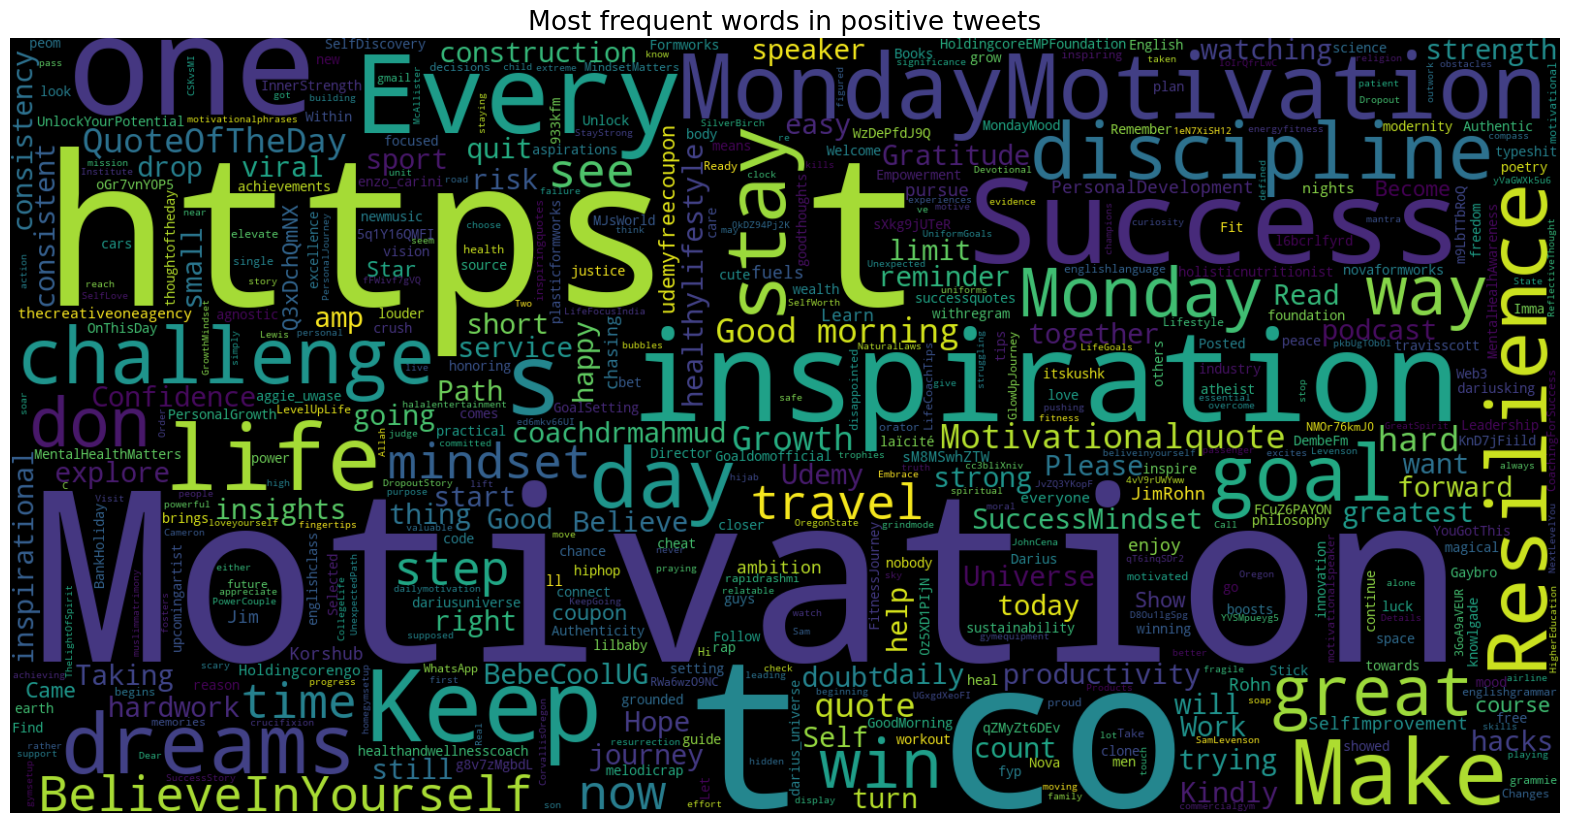

In [27]:
text = ' '.join([word for word in pos_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [28]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Tweet,polarity,sentiment
50,Confidence is key to unlocking your potential....,-0.083333,Negative
0,Success doesn’t come overnight. It takes effor...,-0.109722,Negative
26,Don't sit down and wait for the opportunities ...,-0.155556,Negative
46,"#Motivation thank u daia, ill do it today WML ...",-0.500000,Negative


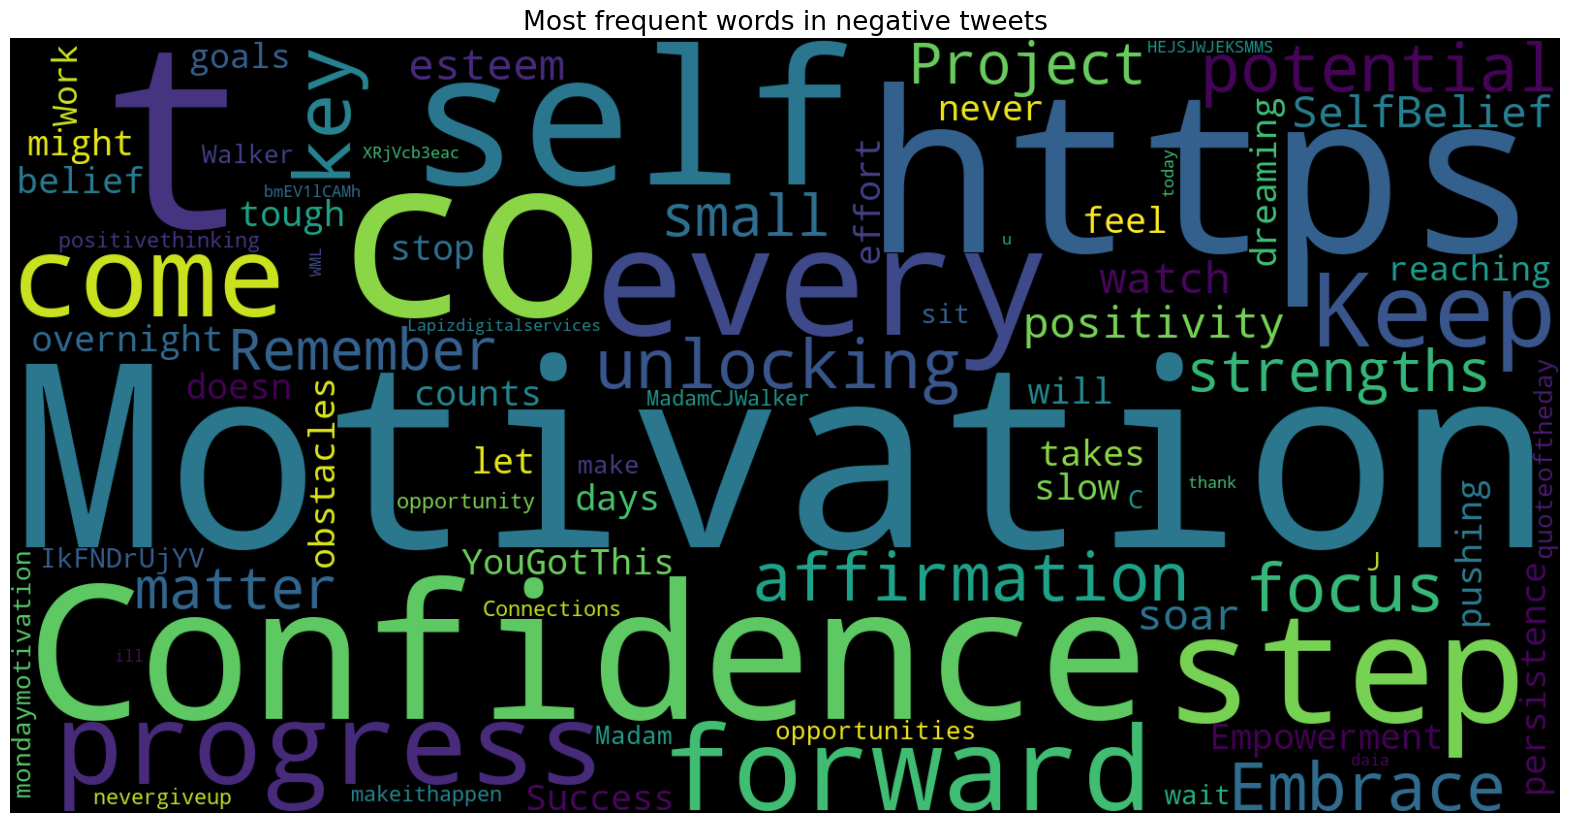

In [29]:
text = ' '.join([word for word in neg_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [30]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Tweet,polarity,sentiment
3,Quotes of the day! ✨\n#motivation https://t.co...,0.0,Neutral
9,Today’s Power Packed Affirmation from Power of...,0.0,Neutral
10,The #pursuit of universal #approval is a never...,0.0,Neutral
14,Create Boundaries : Involve Kids in the Proces...,0.0,Neutral
15,Let’s start creating opportunities ✨\n\n#ventu...,0.0,Neutral


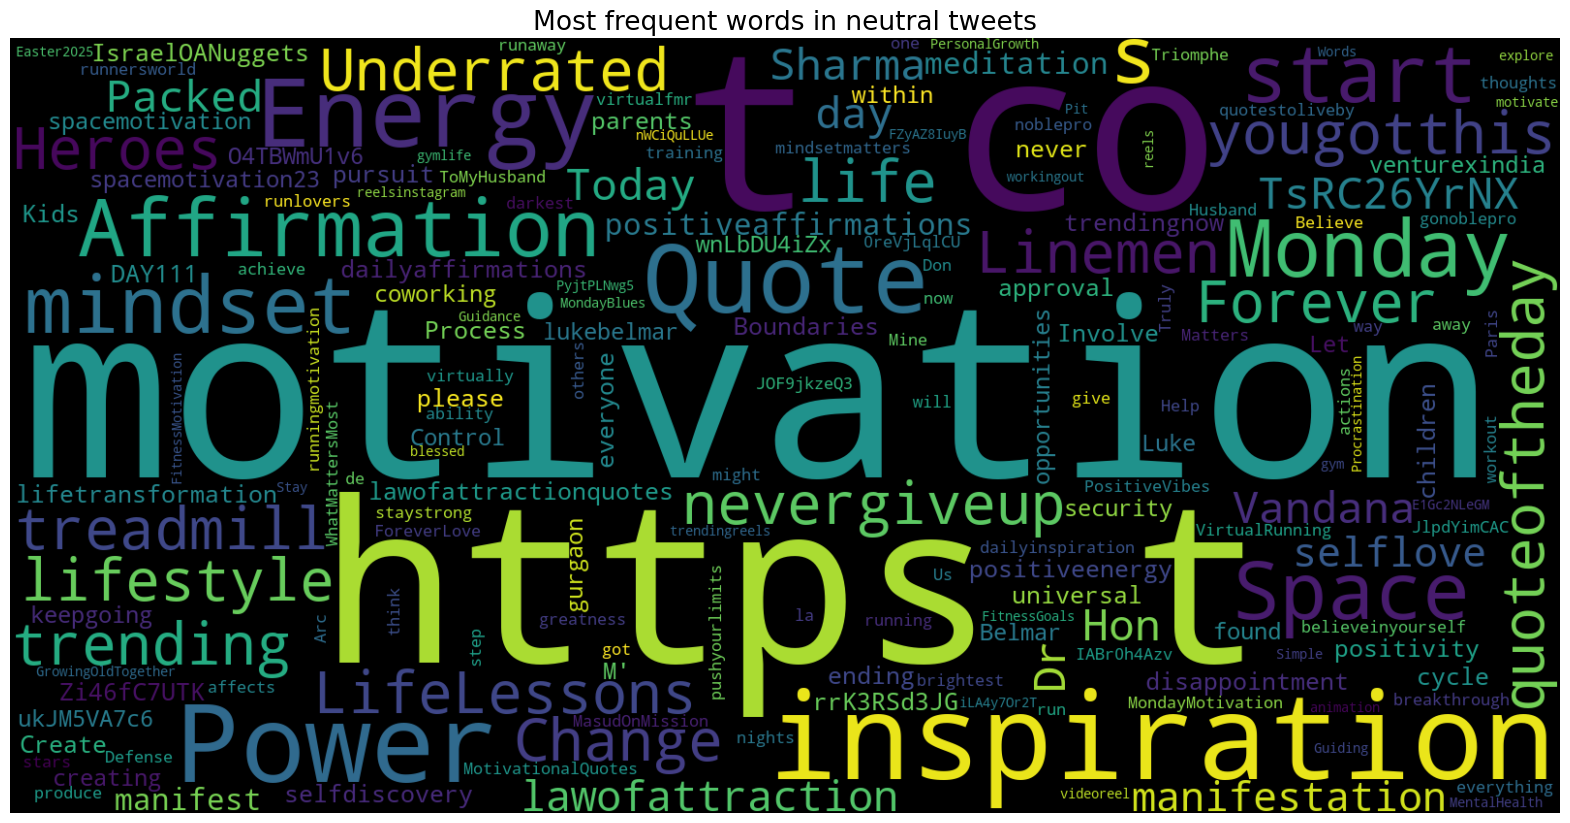

In [31]:
text = ' '.join([word for word in neutral_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [32]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['Tweet'])

In [33]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n", feature_names[:20])


Number of features: 2069

First 20 features:
 ['05377' '05377 goals' '0kdz94pj2k' '0revjlqlcu' '0z5xd1pijn' '100'
 '100 off' '1en7xish12' '2024' '2024 goodmorning' '31' '31 fit'
 '3goa9aveur' '4vv9ruwyww' '5q1y16qmfi' '8801771073876'
 '8801771073876 https' '90' '90 of' '91']


In [34]:
X = text_df['Tweet']
Y = text_df['sentiment']
X = vect.transform(X)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (48, 2069)
Size of y_train: (48,)
Size of x_test: (12, 2069)
Size of y_test: (12,)


In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 58.33%


In [39]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[0 0 3]
 [0 1 2]
 [0 0 6]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       1.00      0.33      0.50         3
    Positive       0.55      1.00      0.71         6

    accuracy                           0.58        12
   macro avg       0.52      0.44      0.40        12
weighted avg       0.52      0.58      0.48        12



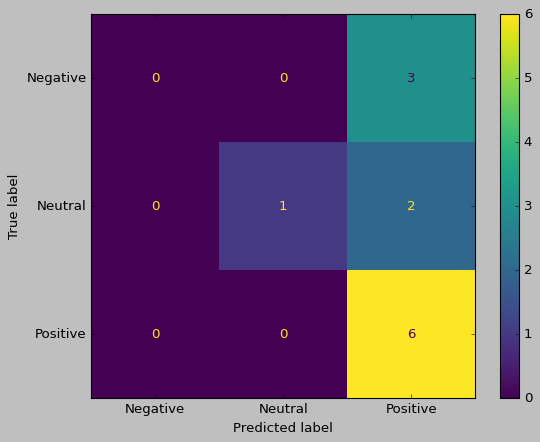

In [40]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [43]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.001}


In [44]:
y_pred = grid.predict(x_test)

In [45]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 50.00%


In [46]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[0 0 3]
 [0 0 3]
 [0 0 6]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.00      0.00      0.00         3
    Positive       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.17      0.33      0.22        12
weighted avg       0.25      0.50      0.33        12



In [47]:
from sklearn.svm import LinearSVC

In [48]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [49]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 66.67%


In [50]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[0 0 3]
 [0 3 0]
 [0 1 5]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.75      1.00      0.86         3
    Positive       0.62      0.83      0.71         6

    accuracy                           0.67        12
   macro avg       0.46      0.61      0.52        12
weighted avg       0.50      0.67      0.57        12



In [51]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [52]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.001}


In [53]:
y_pred = grid.predict(x_test)

In [54]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 50.00%


In [55]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[0 0 3]
 [0 0 3]
 [0 0 6]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.00      0.00      0.00         3
    Positive       0.50      1.00      0.67         6

    accuracy                           0.50        12
   macro avg       0.17      0.33      0.22        12
weighted avg       0.25      0.50      0.33        12



In [56]:
df1 = pd.read_csv('treanding_tweets3.csv')
df2 = pd.read_csv('treanding_tweets.csv')

# Add columns from df2 to df1
df1['Likes'] = df2['Likes']
df1['Retweets'] = df2['Retweets']
df1['Username'] = df2['Username']
df1['Follower_Count'] = df2['Follower_Count']
df1['Created_At'] = df2['Created_At']
df1['Date'] = df2['Date']
df1['Time'] = df2['Time']
df1['Engagement_Ratio'] = df2['Engagement_Ratio']
df1['Hour_of_Post'] = df2['Hour_of_Post']

# Save the updated DataFrame
df1.to_csv('merged_file.csv', index=False)



# 1. **Distribution of Sentiments**

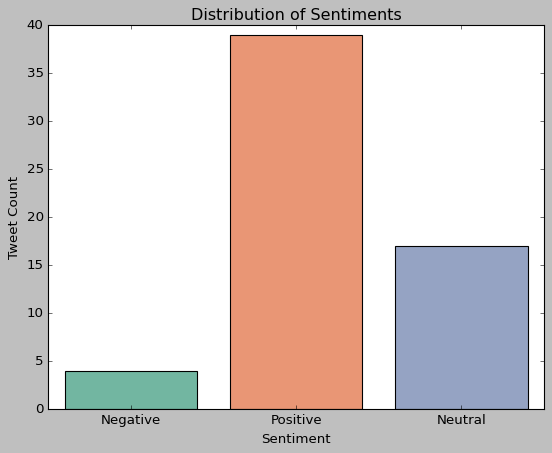

In [57]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns

pdf = PdfPages('Sentiment_Analysis_Charts2.pdf')
sns.countplot(data=df1, x='sentiment', palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
pdf.savefig()  # Save to PDF
plt.show()





# 2. **Tweets Over Time**

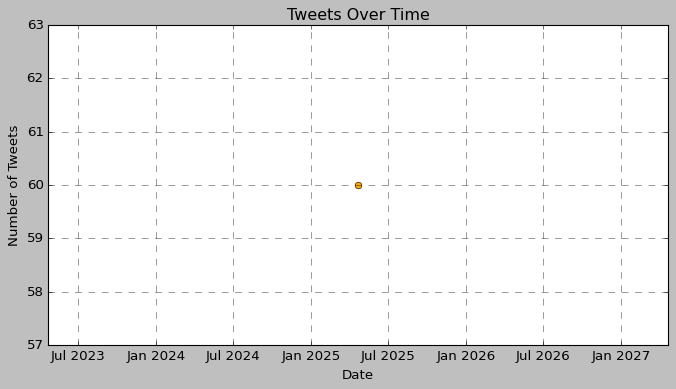

In [58]:
# 2. **Tweets Over Time**
plt.figure(figsize=(10, 5))
df1['Date'] = pd.to_datetime(df1['Created_At']).dt.date
tweets_per_day = df1.groupby('Date').size()
tweets_per_day.plot(kind='line', color='orange', marker='o')
plt.title("Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid(True, linestyle='--', alpha=0.7)
pdf.savefig()  # Save to PDF
plt.show()      # Display the plot


# 3. **Engagement vs Sentiment**

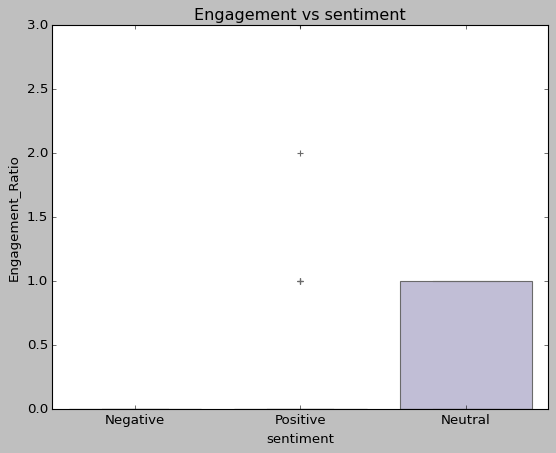

In [59]:
df1['Engagement_Ratio'] = df1['Likes'] + df1['Retweets']
sns.boxplot(data=df1, x='sentiment', y='Engagement_Ratio', palette='Set3')
plt.title('Engagement vs sentiment')
pdf.savefig()
plt.show()


# 4. **Top Hours for Posting**

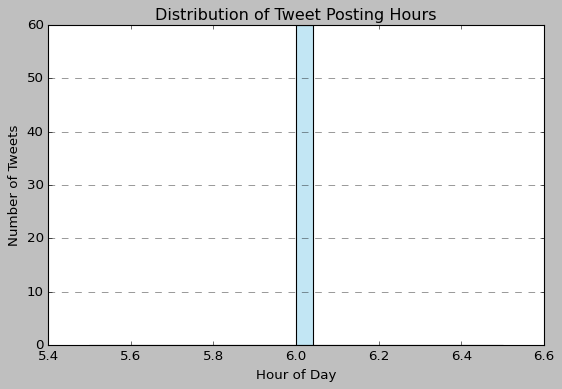

In [60]:
plt.figure(figsize=(8, 5))
sns.histplot(df1['Hour_of_Post'], bins=24, kde=True, color='skyblue')
plt.title("Distribution of Tweet Posting Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save current plot to PDF
pdf.savefig()  
plt.show()


# 5. **Most Common Words in Tweets**

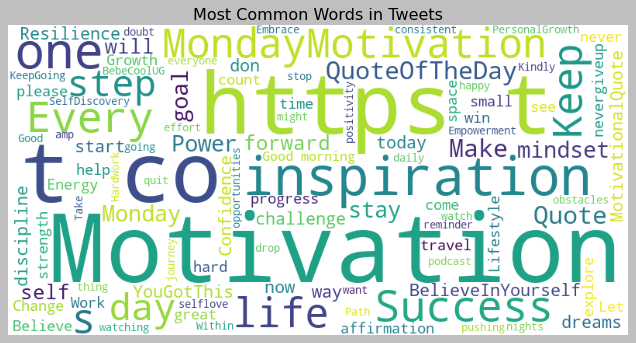

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tweets into one string
all_words = ' '.join(text for text in df['Tweet'])

# Create the word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")

# Save current plot to PDF
pdf.savefig()
plt.show()




# 7. **Likes vs Retweets Scatter Plot**

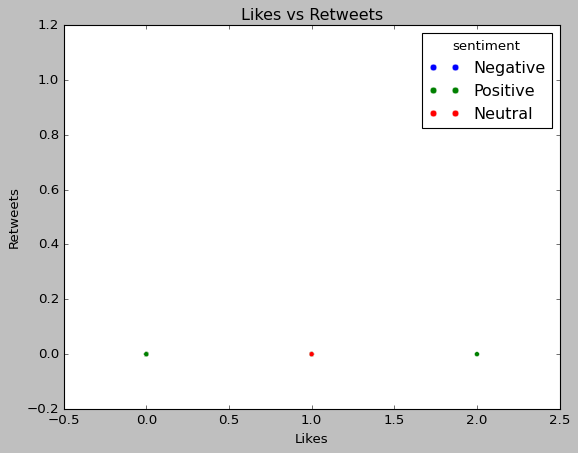

In [62]:
sns.scatterplot(data=df1, x='Likes', y='Retweets', hue='sentiment')
plt.title('Likes vs Retweets')
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.show()


# 8. **Engagement Over Different Hours**

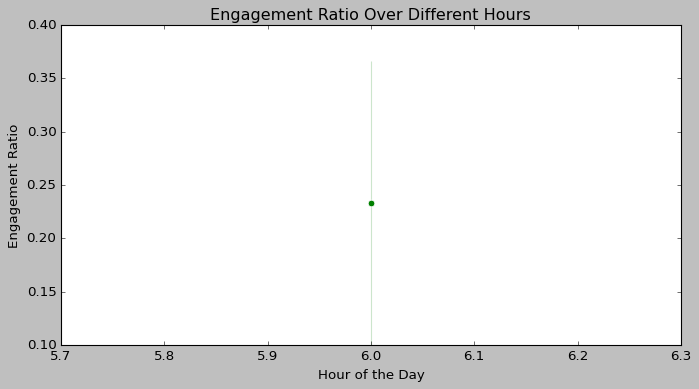

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour_of_Post', y='Engagement_Ratio', data=df1, marker='o', color='green')
plt.title("Engagement Ratio Over Different Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Engagement Ratio")
pdf.savefig()
plt.show()


# 9. **Sentiment Proportion by Day**

<Figure size 800x480 with 0 Axes>

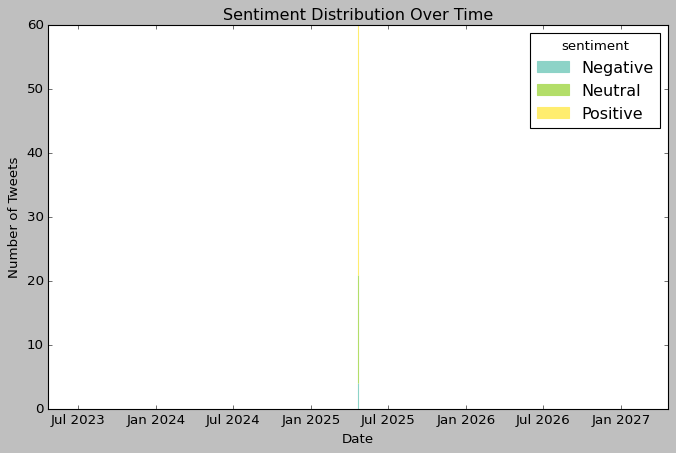

In [64]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sentiment_by_date = df1.groupby(['Date', 'sentiment']).size().unstack()
sentiment_by_date.plot(kind='area', stacked=True, colormap='Set3', figsize=(10, 6))
plt.title("Sentiment Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
pdf.savefig()
plt.show()



# 10. **Correlation Heatmap**

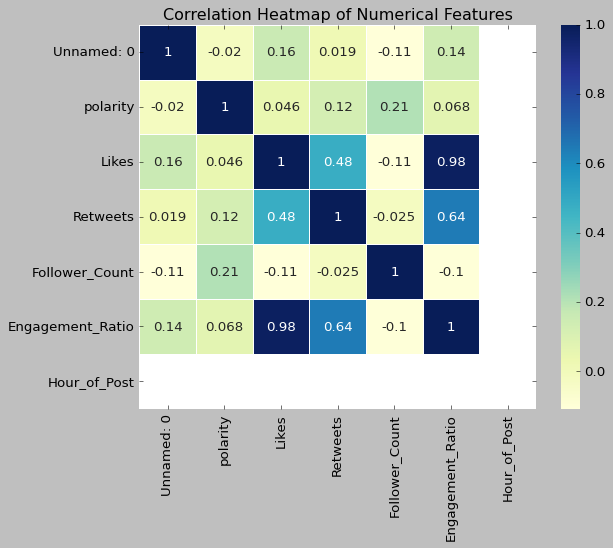

All charts saved to 'Sentiment_Analysis_Charts2.pdf' successfully!


In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df1.select_dtypes(include=['number'])

# Check if numeric_df has columns
if not numeric_df.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)
    plt.title("Correlation Heatmap of Numerical Features")
    pdf.savefig()
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")

pdf.close()
print("All charts saved to 'Sentiment_Analysis_Charts2.pdf' successfully!")  